# <center><b><strong> Customer Segmentation</strong></center>

# **1. Objective** 
This case requires to develop a customer segmentation to understand customers behavior and sepparate them in different groups or cluster according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

### **Data Description :**
The sample Dataset summarizes the usage behavior of about 200 active customers during the last 3 months. The file is at a customer level with 5 behavioral variables.

### **Attribute Information :**
Following is the Data Dictionary for customer dataset :-

**CustomerID** : Unique ID assigned to the customer

**Gender** :Gender of the customer

**Age** : Age of the customer

**Annual Income (k$)** : Annual Income of the customee

**Spending Score** : Score assigned by the mall based on customer behavior and spending nature

# **2. Install & Import Libraries**

In [1]:
# use to visualize missing value
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

from scipy import stats
from scipy.stats import norm, skew 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# clustering algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples, silhouette_score

# **3. Load Datasets**

In [4]:
# load dataset
customer_df = pd.read_csv("D:\\DC Universe\\Ucsc\\Fourth Year\\SCS4204 Data Analytics\\Assignments\\Assignment 3 - Data Mining\\Clustering Segmentation\\Mall_Customers.csv")

# **4. Exploratory Data Analysis**
### 4.1. Data Exploration

For both train and test dataset, We'll explore following things

- First 5 rows
- Data shape
- Data information
- Statistical description
- Data types
- Null value

### 4.1.1. First 5 records

In [5]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 4.1.2. Data Shape 

In [6]:
customer_df.shape

(200, 5)

### 4.1.3. Data Information

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 4.1.4. Statistical description 

In [9]:
customer_df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


### 4.1.5. Data Type 

In [10]:
customer_dtype = customer_df.dtypes
customer_dtype.value_counts()

int64     4
object    1
dtype: int64

### 4.1.6. Null Value 

In [11]:
customer_df.isnull().sum().sort_values(ascending = False).head()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 4.1.7. Visualize missing value using **Misingno** - Train Data

<AxesSubplot:>

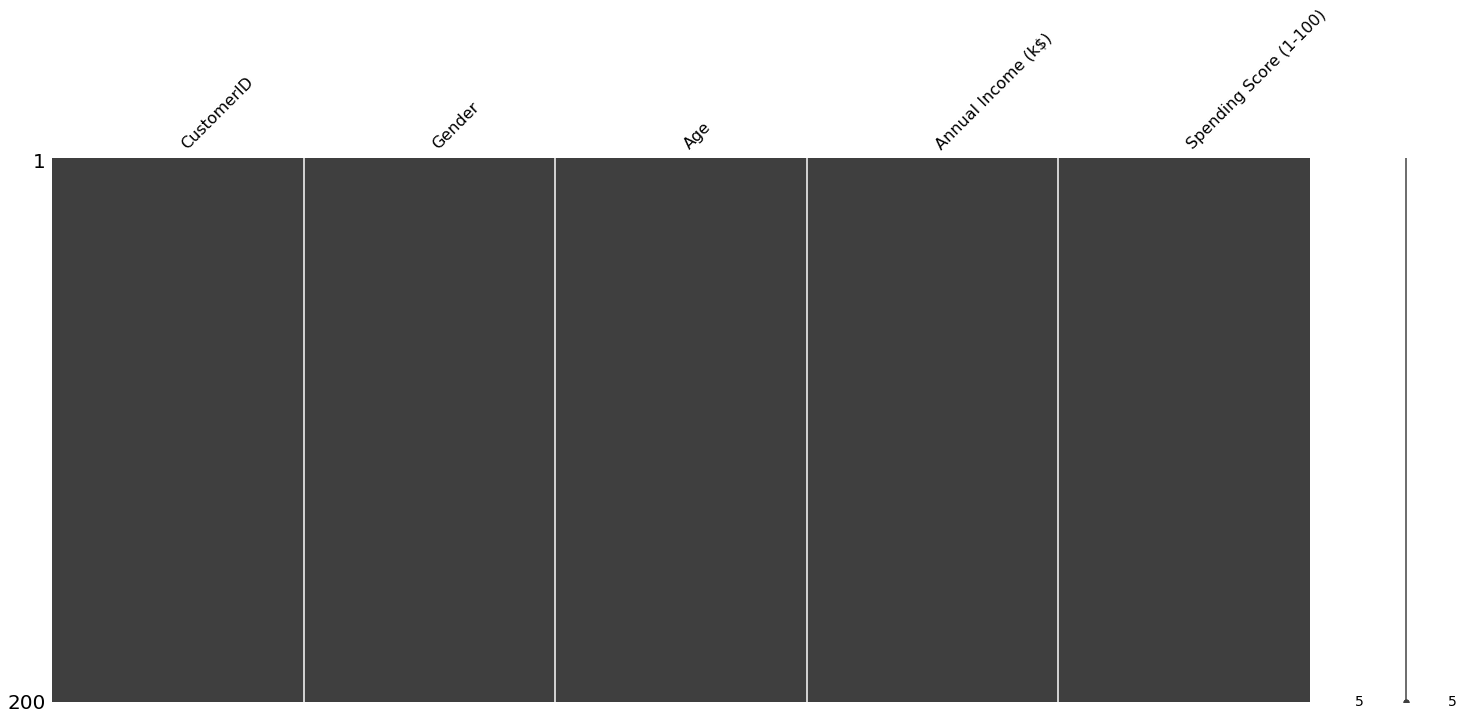

In [12]:
msno.matrix(customer_df)

### 4.1.8. Report - Data Exploration
From the above data exploration we saw that
- There is no missing value present
- Shape of the dataset is (200, 5)
- memory usage by dataset : 7.9+ KB
- There are 4 integer and 1 object type feature present

### 4.3.3.2. Check Distribution - Continuous

In [13]:
numerical_features = [col for col in customer_df.columns if customer_df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(customer_df[col].unique()) < 10 and col not in ['CustomerID']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['CustomerID']]
categorical_features = [col for col in customer_df.columns if customer_df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of categorical features : ",len(categorical_features))

Total Number of Numerical Columns :  4
Number of discrete features :  0
No of continuous features are :  3
Number of categorical features :  1


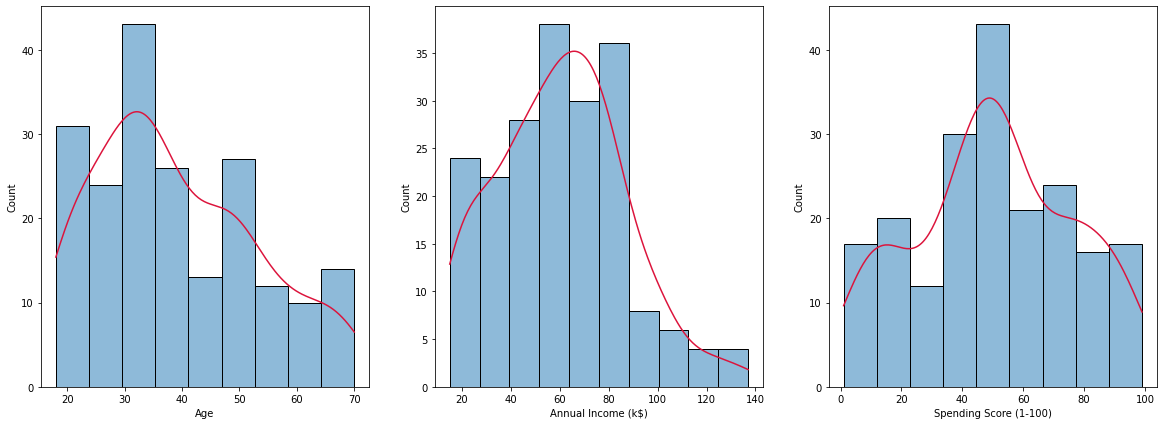

In [14]:
f, axes = plt.subplots(2,2 , figsize=(20, 7), sharex=False)
pos = 1
for i, feature in enumerate(continuous_features):

  plt.subplot(1 , 3 , pos)
  ax = sns.histplot(data=customer_df, x = feature,kde=True,palette="husl") # ax=axes[i%2, i//2]
  ax.lines[0].set_color('crimson')
  pos = pos + 1

In [15]:
# get the features except object types
numeric_feats = customer_df.dtypes[customer_df.dtypes != 'object'].index

# check the skew of all numerical features
skewed_feats = customer_df[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
print(skewness_df.head(10))


 Skew in numberical features: 

                            Skew
Age                     0.481919
Annual Income (k$)      0.319424
CustomerID              0.000000
Spending Score (1-100) -0.046865


Above distribution shows that:
- The distribution of continuous features are normally distributed.


### 4.3.3.2. Check Distribution - Categorical

<AxesSubplot:xlabel='Gender', ylabel='count'>

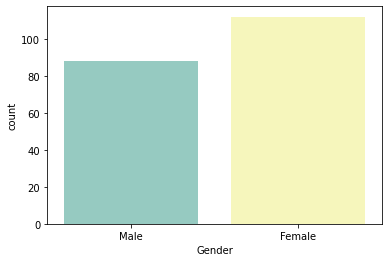

In [16]:
sns.countplot(x='Gender', data=customer_df, palette="Set3")

- Let's see how gender of customers affects to all other features.

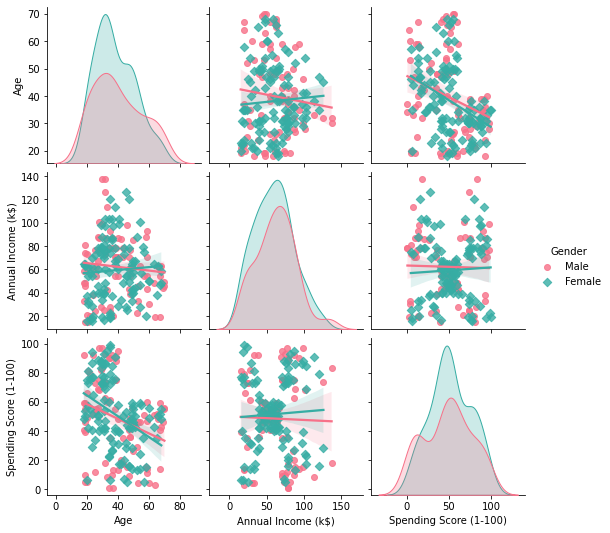

In [17]:
#Pairplot 
sns.pairplot(customer_df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

- From the above pairplot we observe that green colour has higher ratio than pink colour as there are more female customers than male.


- *True Fact*
> > **"I make clothes, women make fashion." —Azzedine Alaïa**



### 4.6. Data Correlation

<AxesSubplot:>

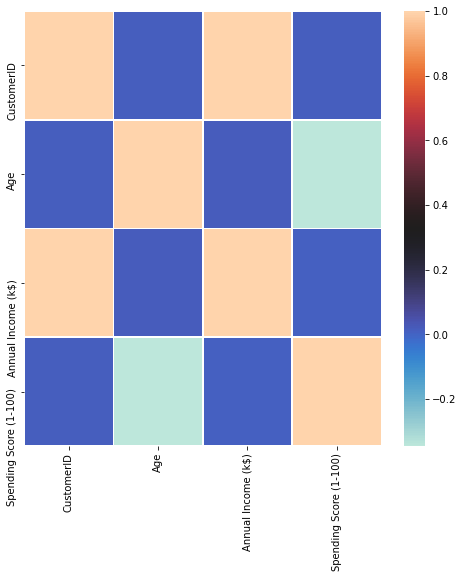

In [18]:
customer_corr = customer_df.corr(method='spearman')
plt.figure(figsize=(8,8))
sns.heatmap(customer_corr, cmap="icefire", linewidths=.5) #'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r'

# **5. Feature Engineering**

### 5.1. Drop Columns

In [19]:
customer_df.drop(columns='CustomerID',axis=1,inplace=True)

### 5.2. Encoding Categorical Features

In [20]:
# Generate one-hot dummy columns
customer_df = pd.get_dummies(customer_df).reset_index(drop=True)

### 5.3. Normalization

In [21]:
# pre_precessing_pipeline = make_pipeline(RobustScaler()) 

# customer_scaled_df = pre_precessing_pipeline.fit_transform(customer_df)

# print(customer_scaled_df.shape)

# **6. Model Development**

In this step we'll apply various clustering algorithms and check which algorithm is best for our dataset. We'r going to use below algorithms.

- Kmeans Clustering
- Agglomerative Clustering
- GaussianMixture Model based clustering
- DBSCAN Clustering


### 6.1. Hyperparameter tuning 

To find the best K value there are many techniques we can use.

1. **Elbow Method**: The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values.
2. **Average silhouette method** : It is a measure of how well each data point fits its corresponding cluster. This method evaluates the quality of clustering. As a general rule, a high average silhouette width denotes better clustering output.
3. **Gap statistic method** : It is a measure of the value of gap statistics. Gap statistics is the difference between the total intracluster changes for various values of k compared to their expected values. The optimal number of clusters is the value that maximizes the value of gap statistics.

- Here we'll use **Elbow Method** to find the best K Value.

### 6.2. Elbow Method

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.p

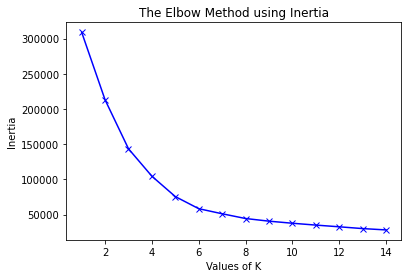

In [22]:
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(customer_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

- From the above elbow method we see that **K = 5** is the best K value for our clustering

### 6.2. K-Means Clustering

In [23]:
# apply kmeans algorithm
kmeans_model=KMeans(5)
kmeans_clusters = kmeans_model.fit_predict(customer_df)


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 6.3. Agglomerative Clustering

In [24]:
# apply agglomerative algorithm
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=5)
agglomerative_clusters = agglo_model.fit_predict(customer_df)

### 6.4. GaussianMixture Model based clustering

In [25]:
GaussianMixture_model = GaussianMixture(n_components=5)
gmm_clusters = GaussianMixture_model.fit_predict(customer_df)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 6.5. DBSCAN Clustering

In [26]:
model_dbscan = DBSCAN(eps=3, min_samples=17)
dbscan_clusters = model_dbscan.fit_predict(customer_df)

### 6.6. Cluster Validity Indices

To compare which clustering algorithm is best for our model, we use various cluster validity indices.
1. Dunn Index
2. Davies Bouldin Index
3. Silhouette Score
4. Calinski - Harabasz Index

- "algorithms that produce clusters with high Dunn index are more desirable" -Wikipedia
- "Objects with a high silhouette value are considered well clustered" -Wikipedia
- "clustering algorithm that produces a collection of clusters with the smallest Davies–Bouldin index is considered the best algorithm" -Wikipedia

- **Here we'll use silhouette score method to choose the best clustering algorithm**

In [27]:
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(customer_df,' : KMeans',kmeans_clusters)
silhouette_method(customer_df,' : Agglomerative',agglomerative_clusters)
silhouette_method(customer_df,' : GaussianMixture',gmm_clusters)
print('=================================================================================')

Clustering   : KMeans  : silhouette score :  0.444603880731791
Clustering   : Agglomerative  : silhouette score :  0.43976347350045475
Clustering   : GaussianMixture  : silhouette score :  0.426670730014298


- From the above analysis,we saw that "K-Means" algorithm has high silhouette score as compared to others. So we'll apply K-Means algorithm for our model.

### 6.7. Cluster Visualization

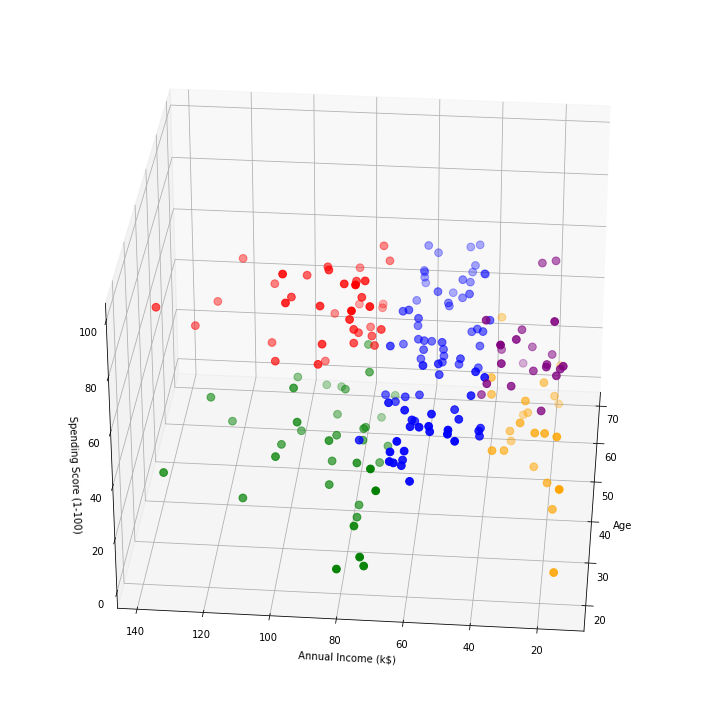

In [28]:
customer_df["label"] = kmeans_clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_df.Age[customer_df.label == 0], customer_df["Annual Income (k$)"][customer_df.label == 0], customer_df["Spending Score (1-100)"][customer_df.label == 0], c='blue', s=60)
ax.scatter(customer_df.Age[customer_df.label == 1], customer_df["Annual Income (k$)"][customer_df.label == 1], customer_df["Spending Score (1-100)"][customer_df.label == 1], c='red', s=60)
ax.scatter(customer_df.Age[customer_df.label == 2], customer_df["Annual Income (k$)"][customer_df.label == 2], customer_df["Spending Score (1-100)"][customer_df.label == 2], c='green', s=60)
ax.scatter(customer_df.Age[customer_df.label == 3], customer_df["Annual Income (k$)"][customer_df.label == 3], customer_df["Spending Score (1-100)"][customer_df.label == 3], c='orange', s=60)
ax.scatter(customer_df.Age[customer_df.label == 4], customer_df["Annual Income (k$)"][customer_df.label == 4], customer_df["Spending Score (1-100)"][customer_df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()